In [11]:
import numpy as np
import matplotlib.pyplot as plt
from FlowControl import add_to_class
from matplotlib import cm

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [13]:
rng = lambda seed : np.random.default_rng(seed)

<h1>Training Neural Networks</h1>

<h2>1. Forward Propagation</h2>

The idea behind neural network, is that we can obtain an extreamly flexible model with non-linear output by combining many different models. This can be obtained by incorporating many layers of parametrized models. Each layer composed of $n$ neurons, with $m$-dimensional input can be described by a single matrix:
$$
W^{[k]} = 
\left[
\begin{array}{cccc}
w_{11}^{[k]} & w_{12}^{[k]} & \ldots & w_{1m}^{[k]}\\
w_{21}^{[k]} & w_{22}^{[k]} & \ldots & w_{2m}^{[k]}\\
\ldots &\ldots & \ldots &\ldots \\
w_{n1}^{[k]} & w_{n2}^{[k]} & \ldots & w_{nm}^{[k]}\\
\end{array}
\right]
$$
and bias vector:
$$
b^{[k]} = 
\left[
\begin{array}{c}
b_{1}^{[k]}\\
b_{2}^{[k]}\\
\ldots \\
b_{n}^{[k]}\\
\end{array}
\right]
$$

If the input of the layer is given by vector $a^{[k-1]}$, then the output is given by:
$$
a^{[k]} = \sigma(z^{[k]})
$$
where
$$
z^{[k]} = W^{[k]}a^{[k-1]} + b^{[k]} = 
\left[
\begin{array}{cccc}
w_{11}^{[k]} & w_{12}^{[k]} & \ldots & w_{1m}^{[k]}\\
w_{21}^{[k]} & w_{22}^{[k]} & \ldots & w_{2m}^{[k]}\\
\ldots &\ldots & \ldots &\ldots \\
w_{n1}^{[k]} & w_{n2}^{[k]} & \ldots & w_{nm}^{[k]}\\
\end{array}
\right]
\left[
\begin{array}{c}
a_{1}^{[k-1]}\\
a_{2}^{[k-1]}\\
\ldots \\
a_{m}^{[k-1]}\\
\end{array}
\right]+
\left[
\begin{array}{c}
b_{1}^{[k]}\\
b_{2}^{[k]}\\
\ldots \\
b_{n}^{[k]}\\
\end{array}
\right]
$$
and $\sigma$ is the activation function. Usually it is one of the following:
- $\sigma(z) = \frac{1}{1+e^{-z}}$ sigmoid activation function
- $ReLU(z) = \left\{ \begin{array}{cc} x < 0 & 0 \\ x \geq 0 & x \end{array}\right.$ ReLU activation function
- $\tanh{z} = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$ tanh activation function

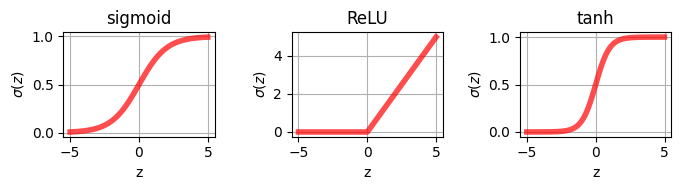

In [14]:
def set_labels(ax,title):
    ax.set_xlabel("z")
    ax.set_ylabel(r"$\sigma(z)$")
    ax.set_title(title)
    ax.grid()

x = np.arange(-5,5,0.01)

fig = plt.figure(figsize = (7,2))
ax = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax.plot(x,1/(1+np.exp(-x)),lw = 4,alpha = 0.7,color = "red")
set_labels(ax,"sigmoid")
ax2.plot(x,np.where(x < 0,0,x),lw = 4,alpha = 0.7,color = "red")
set_labels(ax2,"ReLU")
ax3.plot(x,(np.tanh(x) + 1)/2,lw = 4,alpha = 0.7,color = "red")
set_labels(ax3,"tanh")

plt.tight_layout()
plt.show()

Starting with some feature vector $x$ we can compute the output of the neural network by forward propagation algorithm:
- First we set $a^{[0]} = x$
- For each layer compute: $a^{[k]} = \sigma^{[k]}(W^{[k]}a^{[k-1]} + b^{[k]}) $ where $k = 1,\ldots , l$, $l$ is the number of layers
- set $y = a^{[l]}$


<h2>2. Backpropagation</h2>

The cost function for out model is given by:
$$
J(\{W^{s}\}_{s=1}^{l}) = \frac{1}{2}(y - a^{[l]})^{2}
$$
We can expand the last output as:
$$
\frac{1}{2}\big[y - \sigma^{[k]}(W^{[l]}a^{[l-1]} + b^{[l]})\big]^{2}
$$

Derivative of the cost function with respect to $w_{ij}^{[k]}$ can be computed in the following way:
$$
\frac{\partial J}{\partial w_{ij}^{[k]}} = (a^{[l]}- y)\frac{\partial a^{[l]}}{\partial w_{ij}^{[k]}}
$$
$$
\frac{\partial a^{[l]}}{\partial w_{ij}^{[k]}} = \frac{d\sigma^{[l]}}{dz}\Big|_{z^{[l]}}\sum_{\mu}w^{[l]}_{\mu}\frac{\partial a_{\mu}^{[l-1]}}{\partial w_{ij}^{[k]}} 
$$
$$
\frac{\partial a_{\mu}^{[l-1]}}{\partial w_{ij}^{[k]}} = \Big(\frac{d\sigma^{[l-1]}}{dz}\big)_{\mu}\Big|_{z^{[l-1]}}\sum_{\nu}w^{[l-1]}_{\mu\nu}\frac{\partial a_{\nu}^{[l-2]}}{\partial w_{ij}^{[k]}}
$$
$$
\ldots
$$
$$
\frac{\partial a_{\xi}^{[k+2]}}{\partial w_{ij}^{[k]}} = \Big(\frac{d\sigma^{[k+2]}}{dz}\big)_{\mu}\Big|_{z^{[k+2]}}\sum_{\alpha}w^{[k+2]}_{\xi\alpha}\frac{\partial a_{\alpha}^{[k+1]}}{\partial w_{ij}^{[k]}}
$$
$$
\frac{\partial a_{\alpha}^{[k+1]}}{\partial w_{ij}^{[k]}} = \Big(\frac{d\sigma^{[k+1]}}{dz}\Big)_{\alpha}\Big|_{z^{[k+1]}}\sum_{\beta}w^{[k+1]}_{\alpha\beta}\frac{\partial a_{\beta}^{[k]}}{\partial w_{ij}^{[k]}} =\{\text{equation below}\}= \Big(\frac{d\sigma^{[k+1]}}{dz}\Big)_{\alpha}\Big|_{z^{[k+1]}}w^{[k+1]}_{\alpha i} \Big(\frac{d\sigma^{[k]}}{dz}\Big)_{i}\Big|_{z^{[k]}}a^{[k-1]}_{j}
$$
$$
\frac{\partial a_{\beta}^{[k]}}{\partial w_{ij}^{[k]}} = \Big(\frac{d\sigma^{[k]}}{dz}\Big)_{\beta}\Big|_{z^{[k]}}\sum_{\gamma}\frac{\partial w^{[k]}_{\beta\gamma}}{\partial w^{[k]}_{ij}}a^{[k-1]}_{\gamma} = \frac{d\sigma^{[k]}}{dz}\Big|_{z^{[k]}}\delta_{i\beta}a^{[k-1]}_{j}
$$

To sum up:
$$
\frac{\partial J}{\partial w_{ij}^{[k]}} =\Big(\frac{\partial J}{\partial z^{[k]}}\Big)_{i}a^{[k-1]}_{j} \Rightarrow \nabla_{W^{[k]}}J = \nabla_{z^{[k]}}J\otimes (a^{[k-1]})^{T}
$$
$$
\Big(\frac{\partial J}{\partial z^{[k]}}\Big)_{i} = \sum_{\alpha}\Big(\frac{\partial J}{\partial z^{[k+1]}}\Big)_{\alpha}w_{\alpha i}^{[k+1]}\Big(\frac{d\sigma^{[k]}}{dz}\Big)_{i}\Big|_{z^{[k]}} \Rightarrow \nabla_{z^{[k]}}J = \frac{d\sigma^{[k]}}{dz}\Big|_{z^{[k]}}\times\Big[(W^{[k]})^{T}\nabla_{z^{[k+1]}}J\Big]
$$
where $\times$ denotes element-wise multiplication of two column vectors and $\otimes$ is the standard tensor product.

<h2>3. Neural Network training algorithm</h2>

<h3>3.1 Stochastic gradient descent</h3>

For $i$ in $1:\text{number-of-steps}$:
1. Carry out forward propagation with randomly chosen training  data point $(x^{(i)},y^{(i)})$. For each layer compute: 
    - $z^{[1]},z^{[2]},\ldots , z^{[l]}$
    - $(a^{[0]} = x^{(i)},a^{[1]},\ldots,a^{[l]})$
    - $\sigma'^{[1]}(z^{[1]}),\sigma'^{[2]}(z^{[2]}),\ldots ,\sigma'^{[l]}(z^{[l]})$
2. Set $\nabla_{z^{[l]}}J = (a^{[l]} - y^{(i)})\sigma'^{[l]}(z^{[l]})$
3. For j in $l-1:1$ (backward propagation):
    - compute 
$$
\nabla_{z^{[k]}}J = \sigma'^{[k]}(z^{[k]})\times\Big[(W^{[k]})^{T}\nabla_{z^{[k+1]}}J\Big]
$$
$$
W^{[k]} = W^{[k]} - \eta \nabla_{z^{[k]}}J\otimes (a^{[k-1]})^{T}
$$

In the above algorithm $\eta$ is a hyperparameter - the learning rate

<h2>4. Implementation</h2>

In [15]:
class Layer:
    def __init__(self,input_dim,units,**kwargs):
        self.status = kwargs.get("layer_position","inner")
        self.units = units
        self.xd = input_dim
        self.sigma,self.d_sigma = self.activation(kwargs.get("activation","ReLU"))
        self.w = rng(42).normal(loc = 0.,scale = 0.1,size = self.units*(self.xd + 1)).reshape(units,self.xd+1)

    def activation(self,act_name):
        if act_name == "sigmoid":
            s_ = lambda z : 1/(1+np.exp(-z))
            ds_ = lambda z : np.exp(-z)/(1+np.exp(-z))**2
        elif act_name == "tanh":
            s_ = lambda z : (1+np.tanh(z))/2
            ds_ = lambda z : (1 - np.tanh(z)**2)/2
        elif act_name == "linear":
            s_ = lambda z : z
            ds_ = lambda z : np.ones(len(z))  
        elif act_name == "ReLU":
            s_ = lambda z : np.where(z >= 0, z, 0)
            ds_ = lambda z : np.where(z >= 0, 1, 0)
        else:
            raise KeyError("no activation function specified")
        return s_,ds_

    def forward_pass(self,a_km1):
        assert isinstance(a_km1,np.ndarray) and len(a_km1.shape) == 1 , "invalid input"
        self.x_k = a_km1
        self.z_k = np.sum(self.w[:,:-1] * a_km1[np.newaxis,:],axis = 1) + self.w[:,-1]
        self.a_k = self.sigma(self.z_k)
        self.da_k = self.d_sigma(self.z_k)
        return self.a_k

In [16]:
class NeuralNetwork:
    def __init__(self,layers_tab,eta = 0.01,metric = "MSE"):
        # we assume that layers tab is composed of layers
        assert self.layers_check(layers_tab) , "mismatch in layers dimensions"
        self.layers = layers_tab
        self.eta = eta
        self.grad = False
        self.metric = metric
        self.Loss,self.DLoss = self.Loss_(metric) 
    
    def fit(self,X_data,y_data,steps = 1000):
        n = X_data.shape[0]
        for i in range(steps):
            b = rng(i).integers(n)
            ou = self.forward_propagation(X_data[b,:])
            self.backward_propagation(y_data[b],ou)

    def forward_propagation(self,x_input):
        assert isinstance(x_input,np.ndarray) and len(x_input.shape) == 1, "invalid input shape"
        x_ = x_input
        for layer in self.layers:
            x_ = layer.forward_pass(x_)
        self.grad = True
        return x_
        
    def backward_propagation(self,y,ou):
        assert self.grad == True, "can't compute backward propagation without computing forward pass previoulsy"
        layer = self.layers[-1]
        delta = self.DLoss(y,ou) * layer.da_k
        n = len(self.layers)
        for i in range(len(self.layers) - 1):
            self.update_w(n - 1 - i,delta)
            delta = self.compute_next_delta(n - 1 - i,delta)
        
    def update_w(self,k,delta):
        self.layers[k].w[:,:-1] -= self.eta * np.kron(delta.reshape(-1,1),self.layers[k].x_k)
        self.layers[k].w[:,-1] -= self.eta * delta

    def compute_next_delta(self,k,delta):
        if k == 0:
            return 0
        return (self.layers[k].w[:,:-1].T @ delta) * self.layers[k-1].da_k

    def Loss_(self,metric):
        def inner_loss(y_data,a_l):
            if metric == "MSE":
                return np.sum((y_data - a_l)**2) / 2
            elif metric == "CrossEntropy":
                return -np.sum(y_data * np.log(a_l))
            else:
                raise KeyError("No metric specified")
        def inner_der(y_data,a_l):
            if metric == "MSE":
                return (a_l - y_data)
            elif metric == "CrossEntropy":
                return -y_data / a_l
            else:
                raise KeyError("No metric specified")
        return inner_loss,inner_der
        
    def layers_check(self,layers_tab):
        for i in range(len(layers_tab) - 1):
            if layers_tab[i].units != layers_tab[i+1].xd:
                return False
        return True
        
    def predict(self,X_data):
        y_pred = []
        for i in range(X_data.shape[0]):
            y_pred_i = self.forward_propagation(X_data[i,:])
            y_pred.append(y_pred_i)
        return np.array(y_pred)

<h2>5. Testing neural network</h2>

<h3>5.1 Nonlinear decision boundary</h3>

In [17]:
def generate_data(seed,points):
    rng = np.random.default_rng(seed)
    rng2 = np.random.default_rng(seed + 10)

    x0_ = rng.normal(loc = 0.,scale = 5,size = points)
    x1_ = rng.normal(loc = 0.,scale = 3,size = points)
    X_data_pre = np.vstack((x0_,x1_)).T

    sigma = rng.uniform(size = 4).reshape(2,2)
    avg = (sigma[0,1] + sigma[1,0])/2
    sigma[1,0],sigma[0,1] = avg,avg
    _,U = np.linalg.eig(sigma)

    X_data = (U @ X_data_pre.T).T
    tr_mat = rng2.uniform(size = 4).reshape(2,2)
    z_p = np.sum(X_data * np.sum(tr_mat[np.newaxis,:,:] * X_data[:,np.newaxis,:],axis = 2),axis = 1)
    boundary_rng = rng2.uniform(size = len(z_p))
    y_data = np.where((z_p < 1) * (boundary_rng > 0.1), 0 , 1)
    return X_data,y_data

In [18]:
def plot_points(X_data,y_data,ax,titles = ["y=0","y=1"]):
    classes = np.unique(y_data)
    for i,cl in enumerate(classes):
        points = y_data == cl
        points_tab = [X_data[points,i] for i in range(X_data.shape[1])]
        ax.scatter(*points_tab,color = cm.viridis( i / len(classes)) ,alpha=0.5,label = titles[i])

def confusion_matrix_vis(y_test,y_pred,ax):
    cm_ = confusion_matrix(y_pred,y_test)
    m,n = cm_.shape
    cm_copy = np.zeros((m,n))
    for i in range(m):
        norm = cm_[i,:].sum()
        for j in range(n):
            value = np.round(cm_[i,j] / norm,2) if norm != 0. else np.inf 
            ax.text(j,i,value,color = "black",ha = "center",va = "center")
            cm_copy[i,j] = value
    im = ax.imshow(cm_copy,alpha=0.7)
    ax.set_title("confusion matrix")
    dig = np.unique(y_test)
    ax.set_xticks(dig,dig,color = "black")
    ax.set_yticks(dig,dig,color = "black")
    ax.set_xlabel("predicted label")
    ax.set_ylabel("true label")
    return im

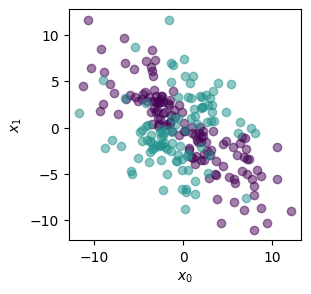

In [19]:
X_data,y_data = generate_data(26,231)
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot()
ax.set_xlabel(r"$x_{0}$")
ax.set_ylabel(r"$x_{1}$")
plot_points(X_data,y_data,ax)
plt.show()

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,random_state=42)

In [21]:
nn = NeuralNetwork([
    Layer(2,9,activation = "ReLU"),
    Layer(9,6,activation = "ReLU"),
    Layer(6,9,activation = "ReLU"),
    Layer(9,1,layer_position = "outer",activation = "tanh")
],eta = 0.05,metric="MSE")

nn.fit(X_train,y_train,steps = 50000)

In [22]:
y_pred = np.where(nn.predict(X_test).flatten() > 0.5,1,0)

In [23]:
x0_ = np.arange(-15,15,0.05)
x1_ = np.arange(-12,12,0.05)

x0,x1 = np.meshgrid(x0_,x1_)
X_test_tot = np.stack((x0,x1),axis = 2).reshape(-1,2)
y_pred_tot_sk = np.where(nn.predict(X_test_tot).flatten() > 0.5,1,0).reshape(len(x1_),len(x0_)) 

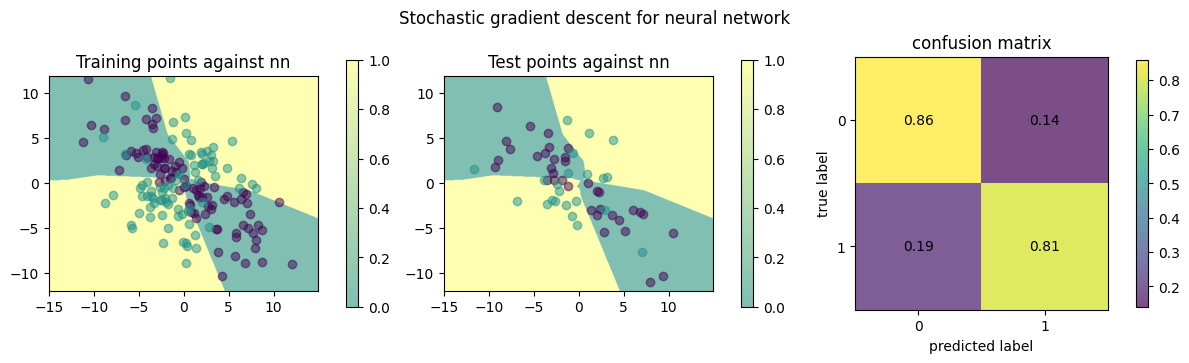

In [24]:
fig = plt.figure(figsize = (12,3.5))
ax = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

plot_points(X_train,y_train,ax)
plot_points(X_test,y_test,ax2)

im = ax.imshow(y_pred_tot_sk,extent=[x0_.min(),x0_.max(),x1_.min(),x1_.max()],origin = "lower",cmap = "summer",alpha = 0.5,label = "predicted value")
im2 = ax2.imshow(y_pred_tot_sk,extent=[x0_.min(),x0_.max(),x1_.min(),x1_.max()],origin = "lower",cmap = "summer",alpha = 0.5,label = "predicted value")
im3 = confusion_matrix_vis(y_test,y_pred,ax3)

ax.set_title("Training points against nn")
ax2.set_title("Test points against nn")

fig.colorbar(im, ax = ax, fraction=0.04, pad=0.09)
fig.colorbar(im2, ax = ax2, fraction=0.04, pad=0.09)
fig.colorbar(im3,ax = ax3, fraction=0.04, pad=0.09)
fig.suptitle("Stochastic gradient descent for neural network")

plt.tight_layout()
plt.show()

<h3>5.2 MNIST dataset</h3>


In [25]:
from sklearn.datasets import load_digits

data_set = load_digits()

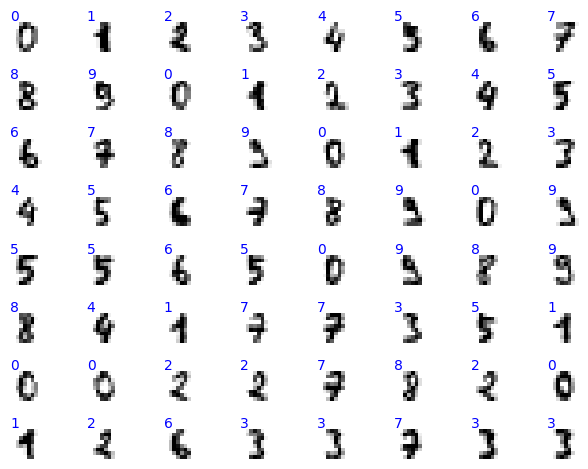

In [26]:
X_digits = data_set["data"]
y_digits_ = data_set["target"]

fig = plt.figure()
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(X_digits[i].reshape(8,8),cmap = "binary")
    ax.text(-1,-1,y_digits_[i],color = "blue")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
# one hot  encoding

y_digits = np.array([np.eye(1,10,k=y_digits_[i]).flatten() for i in range(len(y_digits_))]) 

In [28]:
X_train_digit, X_test_digit, y_train_digit, y_test_digit = train_test_split(X_digits,y_digits,random_state=42)

In [29]:
nn_digits = NeuralNetwork([
    Layer(64,100,activation = "ReLU"),
    Layer(100,120,activation = "ReLU"),
    Layer(120,100,activation = "ReLU"),
    Layer(100,10,layer_position = "outer",activation = "sigmoid")
],eta = 0.001,metric = "MSE")

nn_digits.fit(X_train_digit,y_train_digit,steps = 50000)

In [30]:
y_pred_digit = np.argmax(nn_digits.predict(X_test_digit),axis = 1)
y_test_digit_ = np.argmax(y_test_digit,axis = 1)

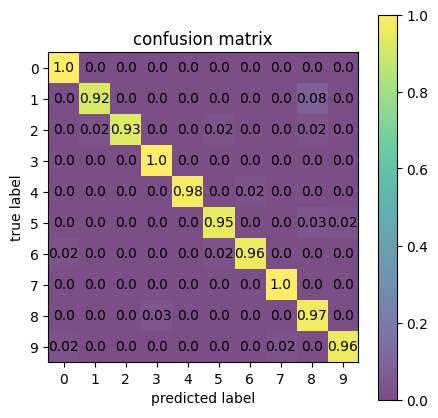

In [31]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot()
im = confusion_matrix_vis(y_test_digit_,y_pred_digit,ax)
fig.colorbar(im,ax = ax)
plt.show()

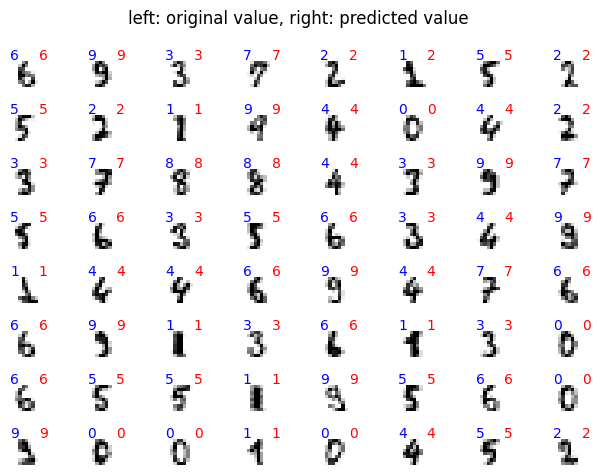

In [32]:
fig = plt.figure()
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(X_test_digit[i].reshape(8,8),cmap = "binary")
    ax.text(-1,-1,y_test_digit_[i],color = "blue")
    ax.text(8,-1,y_pred_digit[i],color = "red")
    plt.axis('off')
fig.suptitle("left: original value, right: predicted value")
plt.tight_layout()
plt.show()